KNN MODEL FOR CLASSIFICATION

Install packages

In [1]:
! pip install tensorflow
! pip install pandas

Data Pre-processing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle

In [3]:
# Loaded dataset and pickle
file_path = "TrainDataset2023.csv"
df=pd.read_csv(file_path, index_col=False)
df.head()
target_lable="pCR (outcome)"
model_path="model/cls_ann"
# pickle.load()

In [4]:
df

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.000000,41.0,0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.000000,39.0,1,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.000000,31.0,0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.000000,35.0,0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.000000,61.0,1,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,TRG002948,0.0,54.500000,58.5,1,0.0,1.0,0.0,3.0,2.0,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,TRG002954,0.0,49.250000,34.3,0,0.0,0.0,1.0,3.0,3.0,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,TRG002958,0.0,48.500000,53.3,0,0.0,0.0,1.0,2.0,1.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,TRG002961,0.0,47.500000,68.8,1,0.0,0.0,0.0,3.0,3.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [5]:
df.drop('ID', axis=1, inplace=True)
df.drop('RelapseFreeSurvival (outcome)', axis=1, inplace=True)

In [22]:
df

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.0,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,1.0,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.0,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.0,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,58.5,1,0.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,0.0,34.3,0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,0.0,53.3,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,0.0,68.8,1,0.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [6]:
# Data imputation 
# Use regression model to do data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(df)

array([[1.00000000e+00, 4.10000000e+01, 0.00000000e+00, ...,
        1.82614990e-01, 3.05076850e-02, 7.57799000e-04],
       [0.00000000e+00, 3.90000000e+01, 1.00000000e+00, ...,
        3.20124530e-02, 1.00572200e-03, 3.68498300e-03],
       [1.00000000e+00, 3.10000000e+01, 0.00000000e+00, ...,
        2.40618220e-02, 5.29448000e-04, 6.44718100e-03],
       ...,
       [0.00000000e+00, 5.33000000e+01, 0.00000000e+00, ...,
        7.37953000e-03, 3.74000000e-05, 2.31058541e-01],
       [0.00000000e+00, 6.88000000e+01, 1.00000000e+00, ...,
        5.40627180e-02, 3.69666500e-03, 1.36797700e-03],
       [0.00000000e+00, 4.60000000e+01, 1.00000000e+00, ...,
        1.86815960e-02, 3.11056000e-04, 2.26761770e-02]])

In [7]:
# Data imputation
# Use KNN model to do data imputation
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(df)

array([[1.00000000e+00, 4.10000000e+01, 0.00000000e+00, ...,
        1.82614990e-01, 3.05076850e-02, 7.57799000e-04],
       [0.00000000e+00, 3.90000000e+01, 1.00000000e+00, ...,
        3.20124530e-02, 1.00572200e-03, 3.68498300e-03],
       [1.00000000e+00, 3.10000000e+01, 0.00000000e+00, ...,
        2.40618220e-02, 5.29448000e-04, 6.44718100e-03],
       ...,
       [0.00000000e+00, 5.33000000e+01, 0.00000000e+00, ...,
        7.37953000e-03, 3.74000000e-05, 2.31058541e-01],
       [0.00000000e+00, 6.88000000e+01, 1.00000000e+00, ...,
        5.40627180e-02, 3.69666500e-03, 1.36797700e-03],
       [0.00000000e+00, 4.60000000e+01, 1.00000000e+00, ...,
        1.86815960e-02, 3.11056000e-04, 2.26761770e-02]])

In [23]:
df.describe()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,400.000000,400.000000,399.000000,399.000000,399.000000,397.000000,398.000000,397.000000,399.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.212658,51.804674,0.547500,0.406015,0.300752,0.333333,2.400504,1.575377,1.148615,0.533835,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,0.409707,10.948522,0.498362,0.491704,0.459161,0.471996,0.500807,0.766487,0.356157,0.499480,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,1.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


<Axes: xlabel='pCR (outcome)', ylabel='count'>

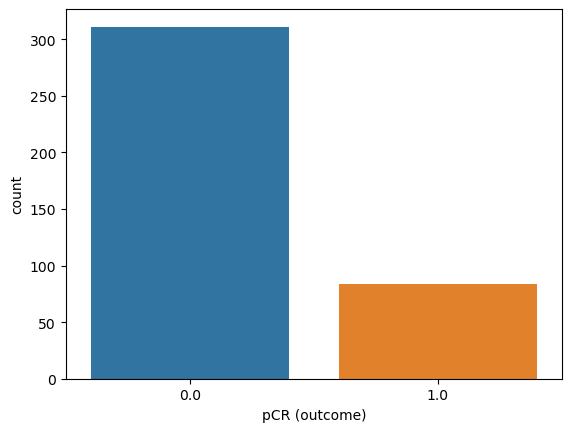

In [9]:
sns.countplot(x=target_lable, data=df)

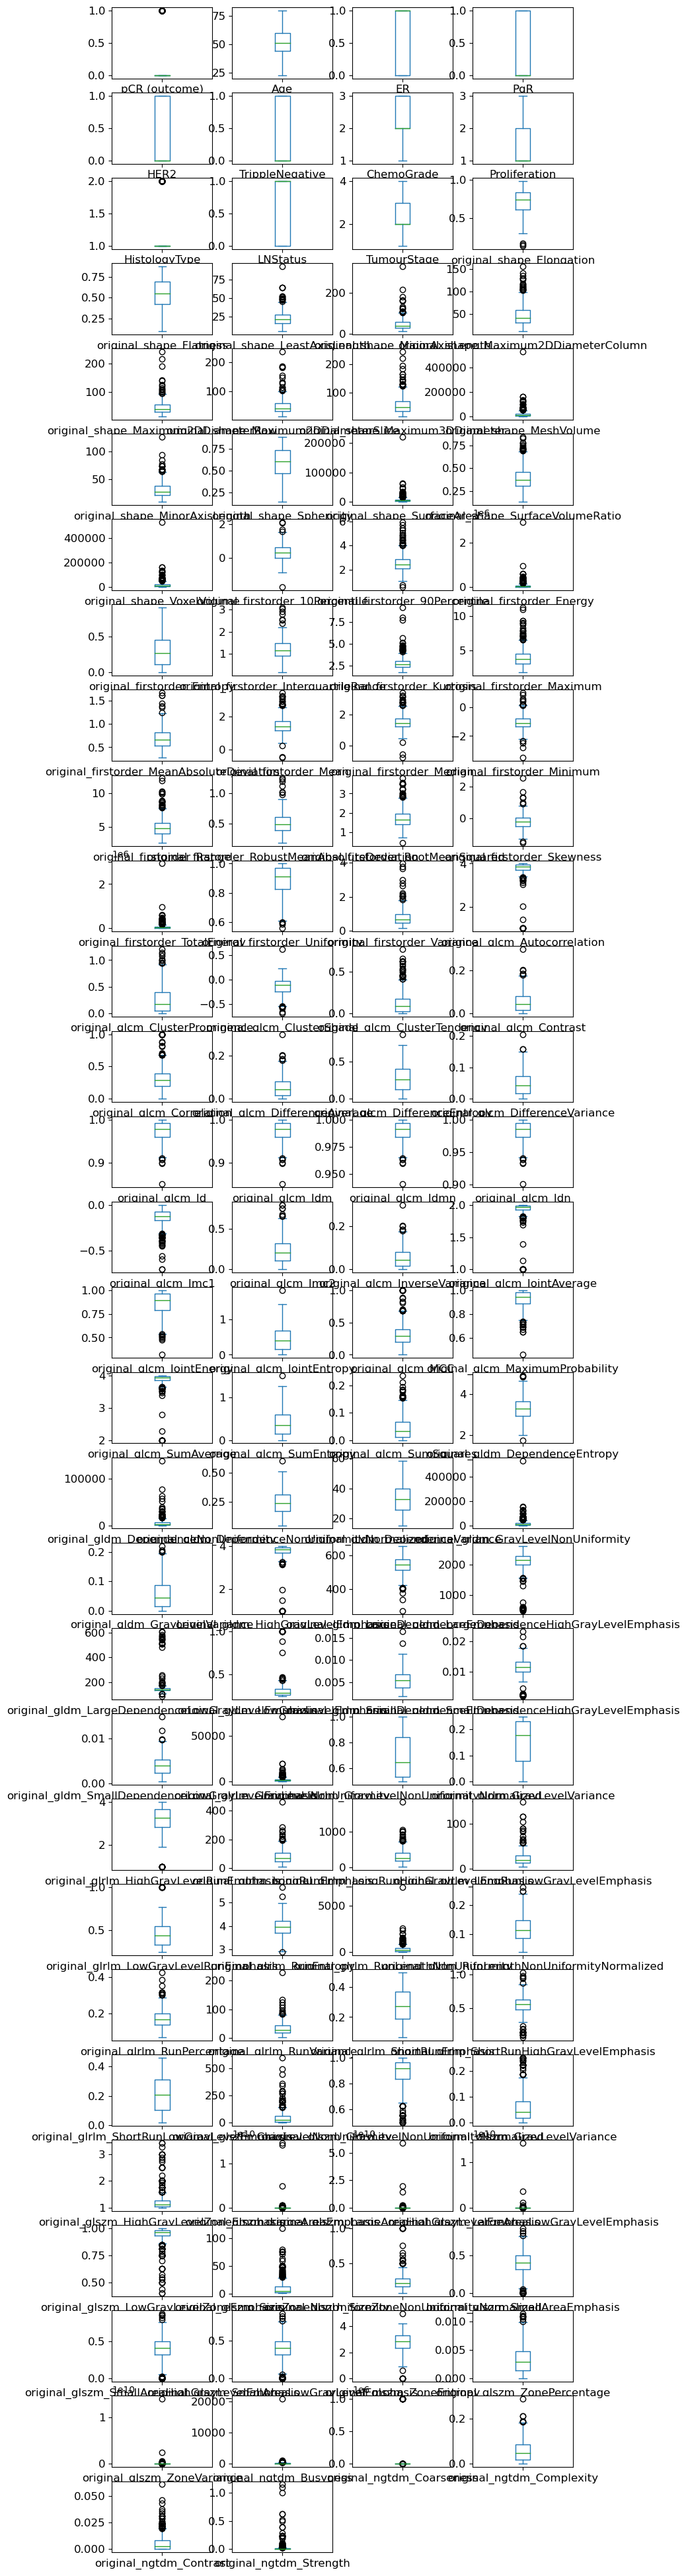

In [10]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(30,4), sharex=False, 
               sharey=False, fontsize=12, figsize=(9,50));

<Axes: >

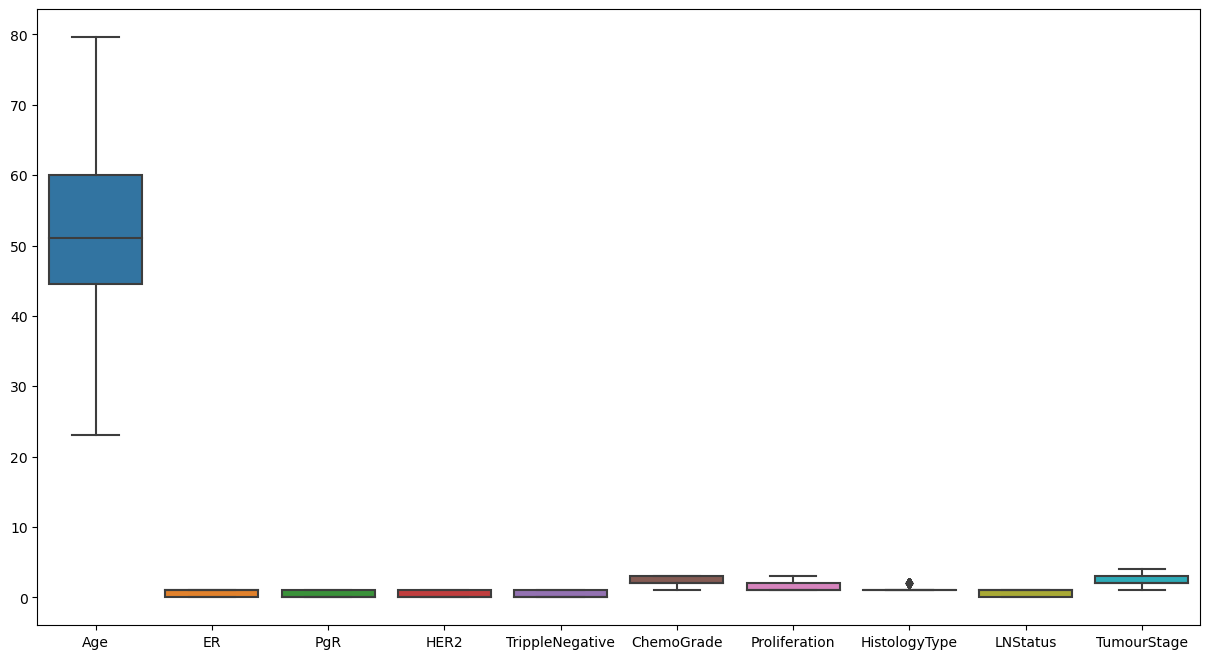

In [11]:
fig,ax=plt.subplots(1,figsize=(15,8))
sns.boxplot(data=df.iloc[:, 1:11],ax=ax)

Feature Selection

In [34]:
X=df.

原始数据集：
<bound method NDFrame.head of      pCR (outcome)   Age  ER  PgR  HER2  TrippleNegative  ChemoGrade  \
0              1.0  41.0   0  0.0   0.0              1.0         3.0   
1              0.0  39.0   1  1.0   0.0              0.0         3.0   
2              1.0  31.0   0  0.0   0.0              1.0         2.0   
3              0.0  35.0   0  0.0   0.0              1.0         3.0   
4              0.0  61.0   1  0.0   0.0              0.0         2.0   
..             ...   ...  ..  ...   ...              ...         ...   
395            0.0  58.5   1  0.0   1.0              0.0         3.0   
396            0.0  34.3   0  0.0   0.0              1.0         3.0   
397            0.0  53.3   0  0.0   0.0              1.0         2.0   
398            0.0  68.8   1  0.0   0.0              0.0         3.0   
399            0.0  46.0   1  0.0   0.0              0.0         2.0   

     Proliferation  HistologyType  LNStatus  ...  \
0              3.0            1.0       1.0  .

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.0,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,1.0,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.0,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.0,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,58.5,1,0.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,0.0,34.3,0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,0.0,53.3,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,0.0,68.8,1,0.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [44]:
X.size

47200

In [43]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# 创建方差阈值选择器，这里选择方差大于等于1的特征
selector = VarianceThreshold(threshold=1)

# 对数据集进行特征选择
X_selected = selector.fit_transform(X)

print("选择后的特征：")
X_selected.size

选择后的特征：


14000

In [45]:
labels=X_selected.columns
labels

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [29]:
# Generate a mask for the upper triangle 
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
# # conditions for filter
# val_min = 0.60
# val_max = 1.00
# # Set up the matplotlib figure
# fig, ax = plt.subplots(figsize=(200, 120))
# plt.title('Feature Correlation')
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(260, 10, as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corrMatt, vmin= val_min,vmax=val_max, square=False, cmap=cmap, mask=mask, 
# ax=ax, annot=True, fmt='.2g', linewidths=1)

In [31]:
# Assuming corrMatt is a Pandas DataFrame
# For instance, let's say corrMatt is defined as follows:
# corrMatt = pd.DataFrame(...) # Replace with your actual data

# conditions for filter
ind_x = mask.all(axis=0)
ind_x

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [32]:
val_min = 0.00
val_max = 0.60

# Find columns to drop
mask_cols = (corrMatt < val_min) | (corrMatt > val_max)
columns_to_drop = mask_cols.all(axis=0)
columns_to_drop = columns_to_drop[columns_to_drop].index.tolist()

# Find rows to drop
mask_rows = (corrMatt < val_min) | (corrMatt > val_max)
rows_to_drop = mask_rows.all(axis=1)
rows_to_drop = rows_to_drop[rows_to_drop].index.tolist()

# Drop both rows and columns
corrMatt_dropped = corrMatt.drop(index=rows_to_drop, columns=columns_to_drop)

corrMatt_dropped

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
pCR (outcome),1.000000,-0.002318,-0.200782,-0.199050,0.215970,0.071391,0.062086,0.124426,-0.057695,-0.148915,...,0.001181,0.009586,-0.063156,0.004911,-0.031687,0.104673,-0.026515,0.124394,0.119814,-0.057622
Age,-0.002318,1.000000,0.005765,-0.114939,0.040706,-0.065935,-0.044197,-0.026902,0.170358,0.124004,...,-0.113668,-0.093954,-0.106148,0.001743,-0.083592,-0.014305,0.090661,0.068994,0.076291,-0.044645
ER,-0.200782,0.005765,1.000000,0.702090,0.103587,-0.776022,-0.262100,-0.249526,0.124474,0.192743,...,-0.004504,-0.007149,-0.021861,-0.009565,-0.046934,0.034885,0.109972,-0.176694,-0.166302,0.055846
PgR,-0.199050,-0.114939,0.702090,1.000000,0.003096,-0.584613,-0.265992,-0.285898,0.132407,0.156902,...,-0.071640,-0.068239,0.093776,0.013780,-0.050290,-0.053709,0.049495,-0.119784,-0.147814,0.004476
HER2,0.215970,0.040706,0.103587,0.003096,1.000000,-0.463739,-0.086603,-0.126602,-0.106150,-0.112200,...,-0.033698,-0.016416,-0.031904,0.048745,-0.023287,0.066348,0.033561,-0.025752,-0.044651,0.060362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
original_ngtdm_Busyness,0.104673,-0.014305,0.034885,-0.053709,0.066348,-0.019702,-0.029844,-0.026996,-0.021809,-0.055917,...,-0.110788,-0.116725,-0.004459,-0.077398,-0.006689,1.000000,-0.031299,0.298992,0.373657,-0.040697
original_ngtdm_Coarseness,-0.026515,0.090661,0.109972,0.049495,0.033561,-0.099821,-0.119033,-0.082719,-0.037083,0.058299,...,-0.435846,-0.444143,-0.454619,-0.217439,-0.005769,-0.031299,1.000000,-0.221460,-0.130649,-0.046420
original_ngtdm_Complexity,0.124394,0.068994,-0.176694,-0.119784,-0.025752,0.178161,0.092535,0.080725,-0.039893,-0.123687,...,-0.166638,-0.215407,0.224279,0.080508,-0.084846,0.298992,-0.221460,1.000000,0.939195,-0.257523
original_ngtdm_Contrast,0.119814,0.076291,-0.166302,-0.147814,-0.044651,0.184193,0.083356,0.080072,-0.056933,-0.115391,...,-0.206701,-0.273891,0.019526,-0.101548,-0.050716,0.373657,-0.130649,0.939195,1.000000,-0.159179


In [33]:
X = df.drop(columns=["pCR (outcome)", 'RelapseFreeSurvival (outcome)',"ID"])
y = df['RelapseFreeSurvival (outcome)']

# i used MinMaxScaler to normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_df['ID'] = df["ID"]

KeyError: "['RelapseFreeSurvival (outcome)', 'ID'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3, random_state=42)

In [ ]:
# the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1] -1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression, no activation function
])

In [ ]:
# then i compiled the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:

# train
model.fit(X_train.loc[:, X_train.columns != 'ID'], y_train, epochs=50, batch_size=32, validation_split=0.3)


In [ ]:
# evaluated the model on the test set
mae = model.evaluate(X_test.loc[:, X_test.columns != 'ID']
, y_test)
print(f'Mean Absolute Error (MAE): {mae}')

# predictions
y_pred = model.predict(X_test.loc[:, X_test.columns != 'ID'])

In [ ]:
y_pred.shape

In [ ]:
final_df